In [145]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Random Market Trade Generator, batch of trades

In [146]:
sns.set()
spread = 0 #Assume Spread In Pips

### Simulation Size

In [147]:
SimSize = 100000

#### Pip Range base area

In [148]:
base = 50

#### Random Generators

In [149]:
randomtrades = np.random.randint(0,high=2,size=SimSize)

tradeid = range(SimSize,SimSize*2)

PipModifier = (np.random.normal(size=SimSize))

### Risk Reward Simulation
    Assume that the average Risk Reward is at least 2 ( like a typical Trader would try and filter by)

In [150]:
RiskReward =  np.random.binomial(n = 14, p = 0.3,size=SimSize)
# I intended to make it a max of RR 7, I use 14 where I will divide by 2 later as a float to get a intervals of 0.5
RiskReward = (RiskReward + 1)/2. # Gets rid of 0 and makes it a float too.

#### Check the min and average

In [151]:
print np.min(RiskReward),np.mean(RiskReward)

0.5 2.60035


#### Logically you should expect the Risk Reward to be a binomial distribution such as this, 
    based on market volatility, the skew should be towards the left, as I've placed the parameter p = 0.3

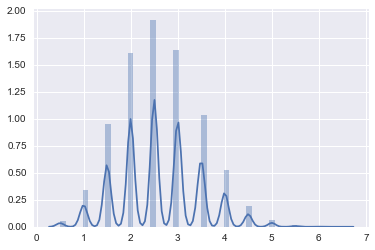

In [152]:
sns.distplot(RiskReward)
plt.show()

#### Headers and inferences

In [153]:
Header = [ 'TradeId','Direction','Size','SLPips', 'TPPips', 'OutcomePips','Outcome$', 'AccumulativeOutcomePips', 'AccumulativeOutcome']

In [154]:
sizerange = [ 0.1 for i in range(SimSize)]
Direction = ['Buy' if direction == 1 else 'Sell' for direction in randomtrades ]

### SL
 The distribution generates including negative numbers so we have to do a mathematical perturbation.
     We'll do that by simply adding the abs of the minimum amount.
         This way, the lowest value will become 0. However, the numbers are all inflated.
         We will then have to divide it by the amount it was inflated by

In [155]:
def GenSL(base=base, PipModifier=PipModifier):
    first = (base *PipModifier) # The normal distribution but with negative values and positive value
    minamt = abs(np.min(first)) # Amount to shift it by
    ratio = minamt/base # Amount that it was inflated by
    output = (first + minamt ) /4
    return output*-1 #output should be negative for SL



#### Same transformation for TP, except Tp is multiplied with Risk : Reward Ratio as a multiplier

In [156]:
def GenTP(base=base, PipModifier=PipModifier, RiskReward=RiskReward):
    first = (base *PipModifier) * RiskReward # The normal distribution but with negative values and positive value
    minamt = abs(np.min(first)) # Amount to shift it by
    ratio = minamt/base # Amount that it was inflated by
    
    return (first + minamt ) /4
    


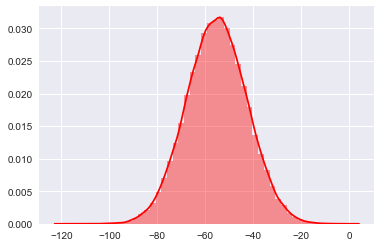

In [157]:
sns.distplot(GenSL(),bins=50, color = 'r')
plt.show()


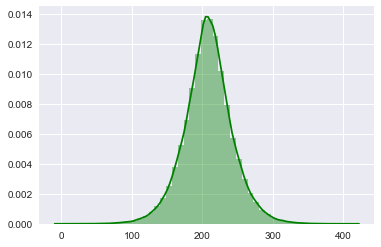

In [158]:
sns.distplot(GenTP(),bins=50, color = 'g')
plt.show()

### Create the TP and SL array

In [159]:
TPPips = GenTP()
SLPips = GenSL()

#### Win/Loss based on Efficient Market Hypothesis

####    Calculate Probability to Win on Random

In [160]:
def Prob(TP,SL):
    Total = TP + abs(SL)
    pb = abs(SL) / Total
    return pb

In [161]:
WinLoss = [ 1 if np.random.random() < Prob(TP,SL) else 0 for TP, SL in zip(TPPips,SLPips)]

### Get the Outcome, Pips
    Since this is going to be in a large loop, we'll produce it via a list comprehension

In [162]:
OutcomePips = [TPPips[index] -spread if win==1 else SLPips[index] for index,win in enumerate(WinLoss)]

#####  Accumulative Outcome Pips
    Accumulative Pips is a step by step iterative accumulative code so a classic for loop will do

In [163]:
AccumulativePips =[]
Totalpips =0
for index,pips in enumerate(OutcomePips):
        Totalpips += pips
        AccumulativePips.append(Totalpips)


In [164]:
data = [ tradeid, Direction, SLPips, TPPips, WinLoss,OutcomePips,AccumulativePips]

### Create the Panda Dataframe

In [165]:
Tradehistory = pd.DataFrame( {'TradeId': tradeid, 'Direction':Direction, 'SLPips':SLPips, 'TPPips':TPPips, 'WinLoss':WinLoss, 'ResultPips':OutcomePips,'PipP&L':AccumulativePips})

In [166]:
Tradehistory

,Direction,PipP&L,ResultPips,SLPips,TPPips,TradeId,WinLoss
0,Buy,227.475250,227.475250,-64.979820,227.475250,100000,1
1,Sell,152.450761,-75.024489,-75.024489,277.161225,100001,0
2,Buy,72.055682,-80.395079,-80.395079,295.958290,100002,0
3,Sell,26.886834,-45.168848,-45.168848,167.604208,100003,0
4,Sell,-20.804392,-47.691226,-47.691226,189.096976,100004,0
5,Buy,-48.693098,-27.888706,-27.888706,112.185986,100005,0
6,Buy,-110.667076,-61.973978,-61.973978,218.123275,100006,0
7,Sell,105.780599,216.447674,-58.075154,216.447674,100007,1
8,Buy,48.406640,-57.373959,-57.373959,210.182965,100008,0
9,Sell,-4.155811,-52.562451,-52.562451,198.544093,100009,0


In [167]:
print Tradehistory.info()
print Tradehistory.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
Direction     100000 non-null object
PipP&L        100000 non-null float64
ResultPips    100000 non-null float64
SLPips        100000 non-null float64
TPPips        100000 non-null float64
TradeId       100000 non-null int64
WinLoss       100000 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.3+ MB
None
              PipP&L     ResultPips         SLPips         TPPips  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean     -881.153441       0.172774     -55.315874     208.131656   
std      5881.943018     109.298843      12.527011      34.282536   
min    -16748.490652    -106.180121    -118.863214       0.000000   
25%     -4571.669642     -61.106808     -63.816824     187.893533   
50%     -1197.372069     -50.883573     -55.278750     208.068400   
75%      2280.124517     -34.679912     -46.842749     228.355461   
max     172

### This is the Pip Accumulated curve over time, or the ROI of the account over time.
        Assuming that the Lot / volume size entered into the market is fixed, then this would be the balance graph you would get in a efficient market hypothesis after SimSize( default is 100k) amount of trades done

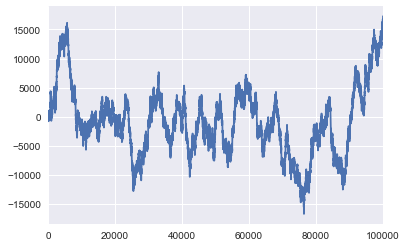

In [168]:
Tradehistory['PipP&L'].plot()

## Performing a bayesian generation on the accounts
    We're going to simulate a few thousand accounts, all placing trades on a random and unpredictable market.

## The above steps was used to generate just 1 account's portfolio of trades
    We will have to create a function to automate that process and that loop it a few thousand times